## INTEGRANTES

LEONARDO PAGANINI - RM96562,
JHONN BRANDON - RM97305,
REGINA POMPEU  - RM97032,
MATHEUS LEITE - RM96893

## Importando as bibliotecas:

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

## Importando e visualizando o dataset:

O dataset abaixo contem os dados do Relatório Global da Fome (GHI em inglês) em 129 países dos anos de 2014 até 2022.

O GHI mede de 5 a 100, sendo 5 menor índice. Ou seja, no país praticamente não há pessoas passando fome. Já o 100 indica que no  quase toda a população do país está em situação de fome.

In [2]:
dados_fome_df = pd.read_csv('Dataset.csv', encoding='latin-1')
dados_fome_df

Rank in 2022                 Country  2000  2007  2014         2022  \
0             NaN                     NaN   NaN   NaN   NaN          NaN   
1             1.0                 Belarus    <5    <5    <5           <5   
2             1.0  Bosnia and Herzegovina   9.3   6.6    <5           <5   
3             1.0                   Chile    <5    <5    <5           <5   
4             1.0                   China  13.3   7.8    <5           <5   
..            ...                     ...   ...   ...   ...          ...   
125         121.0                   Yemen  41.3  38.4  41.7         45.1   
126         121.0                 Burundi    99    99    99  49.935-49.9   
127         121.0                 Somalia    99    99    99  49.935-49.9   
128         121.0             South Sudan    99    99    99  49.935-49.9   
129         121.0                   Syria    99    99    99  49.935-49.9   

    Absolute change Percent change  
0        since 2014     since 2014  
1                 0              0  
2                 0              0  
3                 0              0  
4                 0              0  
..              ...            ...  
125             3.4            8.2  
126               0              0  
127               0              0  
128               0              0  
129               0              0  

[130 rows x 8 columns]

Na tabela acima temos os 4 países melhores colocados, com índice 5. Já os 5 ultimos colocados estão com indice 49.

###### Vamos verificar quais os tipo de dados de cada label:

In [3]:
dados_fome_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank in 2022     129 non-null    float64
 1   Country          129 non-null    object 
 2   2000             129 non-null    object 
 3   2007             129 non-null    object 
 4   2014             129 non-null    object 
 5   2022             129 non-null    object 
 6   Absolute change  130 non-null    object 
 7   Percent change   130 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


###### Vemos que apenas a label "Rank in 2022" tem o dado float. Os dados restantes são do tipo "object".

Iremos fazer uma análise apenas dos anos de 2014 até 2022, portanto, iremos excluir as colunas dos outros anos

In [4]:
dados_fome_df = dados_fome_df.drop("2000", axis='columns')
dados_fome_df = dados_fome_df.drop("2007", axis='columns')

dados_fome_df

Rank in 2022                 Country  2014         2022 Absolute change  \
0             NaN                     NaN   NaN          NaN      since 2014   
1             1.0                 Belarus    <5           <5               0   
2             1.0  Bosnia and Herzegovina    <5           <5               0   
3             1.0                   Chile    <5           <5               0   
4             1.0                   China    <5           <5               0   
..            ...                     ...   ...          ...             ...   
125         121.0                   Yemen  41.7         45.1             3.4   
126         121.0                 Burundi    99  49.935-49.9               0   
127         121.0                 Somalia    99  49.935-49.9               0   
128         121.0             South Sudan    99  49.935-49.9               0   
129         121.0                   Syria    99  49.935-49.9               0   

    Percent change  
0       since 2014  
1                0  
2                0  
3                0  
4                0  
..             ...  
125            8.2  
126              0  
127              0  
128              0  
129              0  

[130 rows x 6 columns]

###### Agora vamos verificar quantos valores nulos existem nas colunas:

In [5]:
dados_fome_df.isnull().sum()

Rank in 2022       1
Country            1
2014               1
2022               1
Absolute change    0
Percent change     0
dtype: int64

###### Como podemos observar, existe apenas um valor nulo nas colunas Rank in 2022, Country, 2014, 2022. Portanto, vamos exclui-los:

In [6]:
#Excluindo valores nulos
dados_fome_df = dados_fome_df.dropna()

In [7]:
#Verificando se a exclusão funcionou:
dados_fome_df.isnull().sum()

Rank in 2022       0
Country            0
2014               0
2022               0
Absolute change    0
Percent change     0
dtype: int64

###### Precisamos converter os dados dos das colunas numericas para "float" para isso teremos os passos abaixo:

  1. Substituir os caracteres que não podem ser lidos como float. No caso estamos substituindo o simbolo '<' por vazio(''):

In [8]:
dados_fome_df = dados_fome_df.replace('<5','5')

2. Verificando a tabela com a substituição feita:

In [9]:
dados_fome_df

Rank in 2022                 Country  2014         2022 Absolute change  \
1             1.0                 Belarus     5            5               0   
2             1.0  Bosnia and Herzegovina     5            5               0   
3             1.0                   Chile     5            5               0   
4             1.0                   China     5            5               0   
5             1.0                 Croatia     5            5               0   
..            ...                     ...   ...          ...             ...   
125         121.0                   Yemen  41.7         45.1             3.4   
126         121.0                 Burundi    99  49.935-49.9               0   
127         121.0                 Somalia    99  49.935-49.9               0   
128         121.0             South Sudan    99  49.935-49.9               0   
129         121.0                   Syria    99  49.935-49.9               0   

    Percent change  
1                0  
2                0  
3                0  
4                0  
5                0  
..             ...  
125            8.2  
126              0  
127              0  
128              0  
129              0  

[129 rows x 6 columns]

###### Na tabela acima temos alguns dados que não tem como transformar em float, por isso faremos as seguintes substituições:
###### * "49.935-49.9" para "49.9"
###### * '34.920\x9634.9' para '34.920'
###### * '.7.5' para '7.5'
###### * '10..6' para '10.6'


In [30]:
dados_fome_df = dados_fome_df.replace('49.935-49.9', '49.9')
dados_fome_df = dados_fome_df.replace('34.920\x9634.9','34.920')
dados_fome_df = dados_fome_df.replace('.7.5','7.5')
dados_fome_df = dados_fome_df.replace('10..6','10.6')

dados_fome_df

Rank in 2022                 Country  2014  2022 Absolute change  \
1             1.0                 Belarus   5.0   5.0               0   
2             1.0  Bosnia and Herzegovina   5.0   5.0               0   
3             1.0                   Chile   5.0   5.0               0   
4             1.0                   China   5.0   5.0               0   
5             1.0                 Croatia   5.0   5.0               0   
..            ...                     ...   ...   ...             ...   
125         121.0                   Yemen  41.7  45.1             3.4   
126         121.0                 Burundi  99.0  49.9               0   
127         121.0                 Somalia  99.0  49.9               0   
128         121.0             South Sudan  99.0  49.9               0   
129         121.0                   Syria  99.0  49.9               0   

     Percent change  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
5               0.0  
..              ...  
125             8.2  
126             0.0  
127             0.0  
128             0.0  
129             0.0  

[129 rows x 6 columns]

###### No dataset também temos o seguinte dado: "34.920\x9634.9", com isso não conseguimos transformar o dado em float, por isso também vamos substituir pelo número "34.920".

Realizar a substituição:

Convertendo os valores "Object" em "Float":

In [33]:
dados_fome_df[['2014', '2022', 'Percent change', 'Absolute change']] = dados_fome_df[['2014', '2022', 'Percent change', 'Absolute change']].astype(float)


In [34]:
dados_fome_df.dtypes

Rank in 2022       float64
Country             object
2014               float64
2022               float64
Absolute change    float64
Percent change     float64
dtype: object

Após todas as transformações, podemos seguir com os gráficos:

##### 1. Grafico de barras exibindo o GHI de cada país em 2022 em ordem crescente

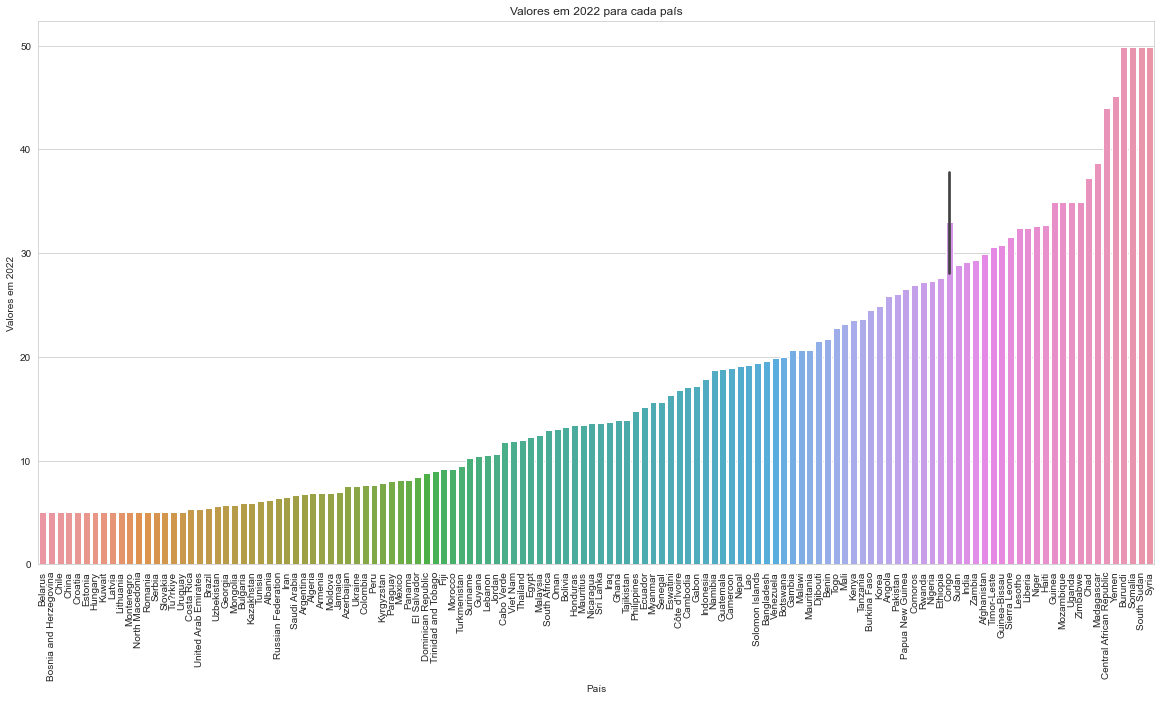

In [35]:
sns.set_style("whitegrid")

plt.figure(figsize=(20, 10))
sns.barplot(x="Country", y="2022", data=dados_fome_df)
plt.xlabel("País")
plt.ylabel("Valores em 2022")
plt.title("Valores em 2022 para cada país")

plt.xticks(rotation=90)

plt.show()

##### 2. Grafico de dispersão que mostra a relação entre os valores em 2014 e 2022 para cada país. Os países com pontos mais próximos à linha diagonal têm mudanças menores, enquanto os pontos mais distantes da linha diagonal indicam mudanças maiores.

Notasse que há um agrumento entre os pontos mais abaixo do gráfico e uma tendencia na diagonal

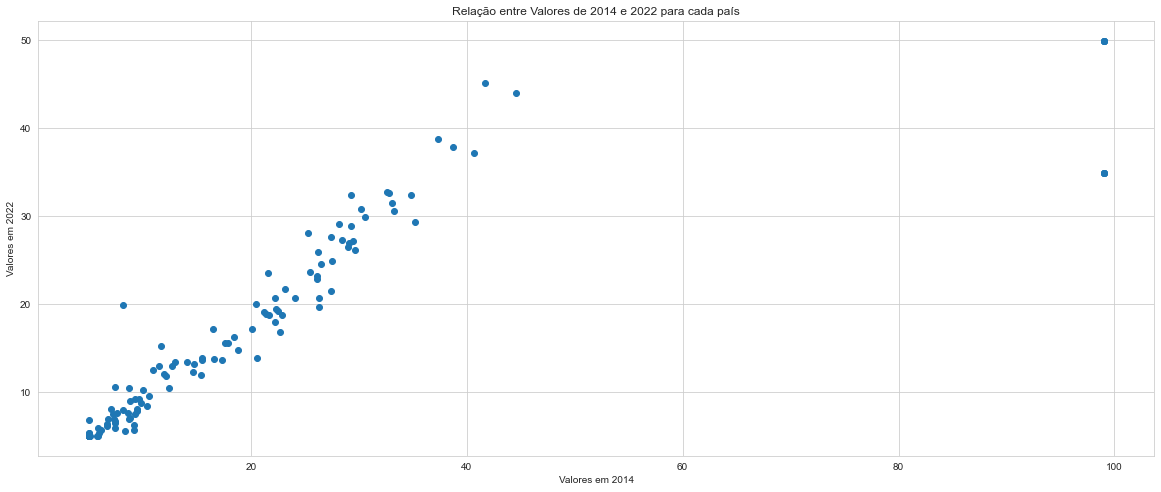

In [40]:
plt.figure(figsize=(20, 8))

plt.scatter(dados_fome_df["2014"], dados_fome_df["2022"])

plt.xlabel("Valores em 2014")
plt.ylabel("Valores em 2022")
plt.title("Relação entre Valores de 2014 e 2022 para cada país")

plt.show()

##### 3. Grafico de de barras que mostra a variação Percentual desde 2014. Os países com pontos próximos a zero tiveram pouca variação, enquanto os pontos mais afastados de zero indicam uma variação maior. Valores positivos representam um aumento desde 2014, enquanto valores negativos representam uma redução.

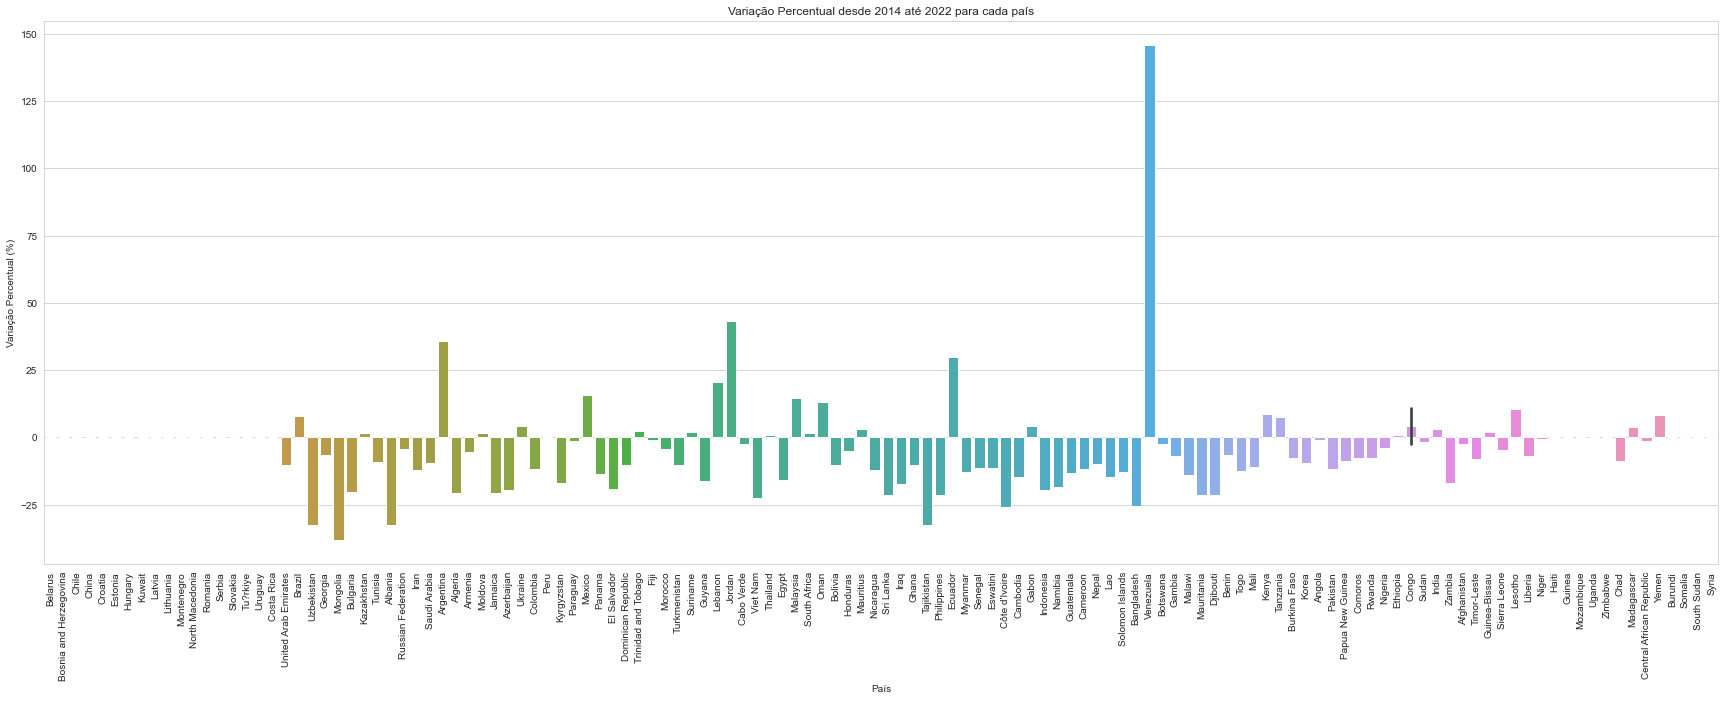

In [39]:
plt.figure(figsize=(30, 10))
sns.barplot(x="Country", y="Percent change", data=dados_fome_df)

plt.xlabel("País")
plt.ylabel("Variação Percentual (%)")
plt.title("Variação Percentual desde 2014 até 2022 para cada país")

plt.xticks(rotation=90)

plt.show()

###### Apresentando os dados com maior valor em cada coluna.

Observa-se que em 2014 o indice estava em seu maior patamar, atingindo quase o topo que é 100. Já em 2022 o maior indice é de 49.9, praticamente metade de 2014. Entretanto a fome ainda atinge muitas pessoas, pois 49.9 ainda não é um bom indicativo.

In [61]:
dados_fome_df[['2014', '2022', 'Absolute change', 'Percent change']].max()

2014                99.0
2022                49.9
Absolute change     11.8
Percent change     145.7
dtype: float64

###### Apresentando a média dos dados de cada coluna.

Observa-se que de 2014 a 2022 a média do indice caiu em média 4 pontos. Entretanto 17.17 não pode ser considerado como o dado que atinge todos os paises, uma vez que a média baixa se da ao fato de haver muitos países listados e alguns com o indice minimo e outros com indice altissimo.

In [62]:
dados_fome_df[['2014', '2022', 'Absolute change', 'Percent change']].mean()

2014               21.639535
2022               17.170388
Absolute change    -0.949612
Percent change     -4.055814
dtype: float64

###### Apresentando algumas estatisticas que podemos obter facilmente

Podemos ver a média, o desvio padrão (std), os valores minimos, os quarts de 25%, 50%, 75% e os valores máximos de cada coluna

In [56]:
dados_fome_df[['2014', '2022', 'Absolute change', 'Percent change']].describe()

2014        2022  Absolute change  Percent change
count  129.000000  129.000000       129.000000      129.000000
mean    21.639535   17.170388        -0.949612       -4.055814
std     22.372236   11.811849         2.254271       17.987856
min      5.000000    5.000000        -6.700000      -38.000000
25%      7.400000    6.900000        -2.200000      -12.200000
50%     15.400000   13.600000        -0.500000       -2.500000
75%     26.500000   24.900000         0.000000        0.000000
max     99.000000   49.900000        11.800000      145.700000

## Modelo Preditivo

In [65]:
banco_comida = pd.read_csv('live1.csv')

In [66]:
banco_comida

Area   Item Element  Year  Unit  \
0                                   Afghanistan  Asses  Stocks  1961  Head   
1                                   Afghanistan  Asses  Stocks  1962  Head   
2                                   Afghanistan  Asses  Stocks  1963  Head   
3                                   Afghanistan  Asses  Stocks  1964  Head   
4                                   Afghanistan  Asses  Stocks  1965  Head   
...                                         ...    ...     ...   ...   ...   
122453  Net Food Importing Developing Countries  Sheep  Stocks  2016  Head   
122454  Net Food Importing Developing Countries  Sheep  Stocks  2017  Head   
122455  Net Food Importing Developing Countries  Sheep  Stocks  2018  Head   
122456  Net Food Importing Developing Countries  Sheep  Stocks  2019  Head   
122457  Net Food Importing Developing Countries  Sheep  Stocks  2020  Head   

              Value  
0         1300000.0  
1          851850.0  
2         1001112.0  
3         1150000.0  
4         1300000.0  
...             ...  
122453  364166482.0  
122454  371357850.0  
122455  377303293.0  
122456  397970957.0  
122457  406555086.0  

[122458 rows x 6 columns]

In [70]:
banco_comida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122458 entries, 0 to 122457
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Area     122458 non-null  object 
 1   Item     122458 non-null  object 
 2   Element  122458 non-null  object 
 3   Year     122458 non-null  int64  
 4   Unit     122458 non-null  object 
 5   Value    120194 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 5.6+ MB


In [94]:
banco_comida = banco_comida.dropna

AttributeError: 'function' object has no attribute 'dropna'

In [95]:
banco_comida

<bound method DataFrame.dropna of                                            Area   Item Element  Year  Unit  \
0                                   Afghanistan  Asses  Stocks  1961  Head   
1                                   Afghanistan  Asses  Stocks  1962  Head   
2                                   Afghanistan  Asses  Stocks  1963  Head   
3                                   Afghanistan  Asses  Stocks  1964  Head   
4                                   Afghanistan  Asses  Stocks  1965  Head   
...                                         ...    ...     ...   ...   ...   
122453  Net Food Importing Developing Countries  Sheep  Stocks  2016  Head   
122454  Net Food Importing Developing Countries  Sheep  Stocks  2017  Head   
122455  Net Food Importing Developing Countries  Sheep  Stocks  2018  Head   
122456  Net Food Importing Developing Countries  Sheep  Stocks  2019  Head   
122457  Net Food Importing Developing Countries  Sheep  Stocks  2020  Head   

              Value  
0      

<Axes: >

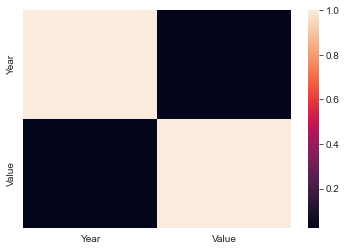

In [72]:
sns.heatmap(banco_comida.corr())

In [74]:
len(banco_comida)

122458

In [88]:
# Escolhendo as colunas preditivas e alvo
x = banco_comida.drop(columns=["Area", "Item", "Element", "Unit", "Value"])
y = banco_comida['Value']

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [89]:
len(x_train), len(x_test), len(y_train), len(y_test)

(97966, 24492, 97966, 24492)

In [90]:
from sklearn.linear_model import LinearRegression

In [96]:
lr = LinearRegression()

lr.fit(x_train,y_train)

ValueError: Input y contains NaN.

## IA GENERATIVA

A fome é um problema complexo e multidimensional, e a aplicação da Inteligência Artificial, juntamente com o ChatGPT, pode desempenhar um papel importante no combate a esse desafio. Aqui estão algumas maneiras em que essas tecnologias podem ser aplicadas:

Previsão de colheitas: A Inteligência Artificial pode ser usada para analisar uma variedade de dados, como dados climáticos, históricos de colheitas e informações de satélite, para prever com maior precisão a produção agrícola em diferentes regiões. Essas previsões podem ajudar os agricultores a se prepararem melhor e implementarem estratégias de mitigação para reduzir perdas e garantir uma oferta estável de alimentos.

Otimização do gerenciamento de recursos: A IA pode ser utilizada para otimizar o uso de recursos, como água e fertilizantes, de forma mais eficiente e sustentável. Algoritmos de aprendizado de máquina podem analisar dados sobre condições do solo, características das plantas e padrões de irrigação para fornecer recomendações personalizadas aos agricultores sobre a quantidade adequada de recursos a serem aplicados em diferentes áreas.

Monitoramento de safras e detecção de pragas: Por meio do processamento de imagens de satélite e técnicas de visão computacional, a IA pode ajudar a monitorar as safras em tempo real e detectar rapidamente a presença de pragas, doenças ou outros problemas que possam afetar a produtividade das plantações. Isso permite uma resposta mais rápida e precisa, evitando perdas significativas.

Acesso a informações e conhecimentos agrícolas: O ChatGPT e outras interfaces de conversação alimentadas por IA podem ser usados para fornecer informações e conhecimentos agrícolas a agricultores de pequena escala, que muitas vezes têm acesso limitado a recursos educacionais. Os agricultores podem fazer perguntas, receber orientações sobre práticas agrícolas sustentáveis, solução de problemas e obter informações sobre melhores práticas de cultivo e armazenamento de alimentos.

Logística e distribuição eficientes: A IA pode ser usada para otimizar a logística e a distribuição de alimentos, garantindo que os recursos sejam alocados de forma eficiente e que os alimentos cheguem aos locais certos, na quantidade certa e no momento adequado. Algoritmos de aprendizado de máquina podem analisar dados sobre demanda, infraestrutura de transporte e condições de armazenamento para ajudar a evitar desperdícios e melhorar a eficiência da cadeia de abastecimento de alimentos.

É importante ressaltar que a aplicação da IA no combate à fome é apenas uma parte da solução, e que medidas políticas, econômicas e sociais também desempenham um papel fundamental na erradicação da fome. No entanto, a IA e o ChatGPT podem fornecer ferramentas valiosas para melhorar a eficiência, a produtividade e o acesso a informações no setor agrícola, contribuindo para a redução da fome e da insegurança alimentar.